# Preprocessing 
Purpose of Preprocessing is to convert entire data into numerical format so that the machine can understand

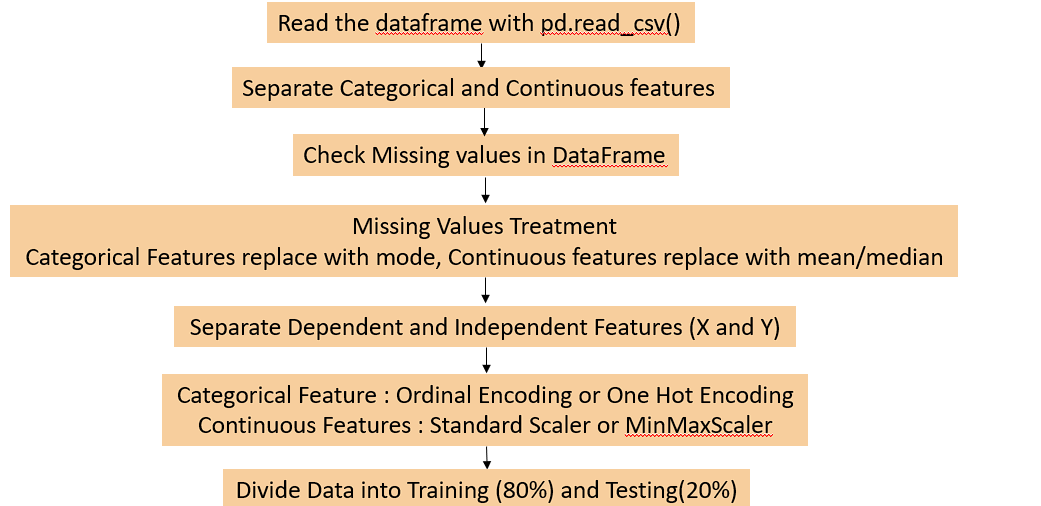

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the dataset

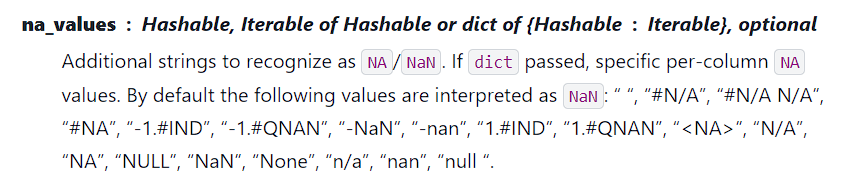

In [3]:
import pandas as pd
df = pd.read_csv('Cars93.csv', na_values=['', 'NA'], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Step 2: Perform Basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [5]:
m = df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [6]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [7]:
df.duplicated().sum()

0

### Step 3: Replace missing values
categorical (Text) - Mode 

continuious (Numerical) - Median / mean

In [8]:
df['AirBags'].mode()

0    Driver only
Name: AirBags, dtype: object

In [9]:
df['AirBags'].mode()[0]

'Driver only'

In [10]:
df['AirBags'].value_counts()

AirBags
Driver only           42
None                  33
Driver & Passenger    14
Name: count, dtype: int64

In [11]:
df['Rear.seat.room'].mean()

27.82967032967033

In [12]:
df['Luggage.room'].median()

14.0

In [13]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [14]:
df.dtypes

id                      int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [17]:
df[df['Price']<10]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
22,23,Dodge,Colt,Small,7.9,9.2,10.6,29,33,None,...,5,174,98,66,32,26.5,11.0,2270,USA,Dodge Colt
30,31,Ford,Festiva,Small,6.9,7.4,7.9,31,33,None,...,4,141,90,63,33,26.0,12.0,1845,USA,Ford Festiva
38,39,Geo,Metro,Small,6.7,8.4,10.0,46,50,None,...,4,151,93,63,34,27.5,10.0,1695,non-USA,Geo Metro
43,44,Hyundai,Excel,Small,6.8,8.0,9.2,29,33,None,...,5,168,94,63,35,26.0,11.0,2345,non-USA,Hyundai Excel
52,53,Mazda,323,Small,7.4,8.3,9.1,29,37,None,...,4,164,97,66,34,27.0,16.0,2325,non-USA,Mazda 323
72,73,Pontiac,LeMans,Small,8.2,9.0,9.9,31,41,None,...,4,177,99,66,35,25.5,17.0,2350,USA,Pontiac LeMans
79,80,Subaru,Justy,Small,7.3,8.4,9.5,33,37,None,...,4,146,90,60,32,23.5,10.0,2045,non-USA,Subaru Justy
82,83,Suzuki,Swift,Small,7.3,8.6,10.0,39,43,None,...,4,161,93,63,34,27.5,10.0,1965,non-USA,Suzuki Swift
83,84,Toyota,Tercel,Small,7.8,9.8,11.8,32,37,Driver only,...,5,162,94,65,36,24.0,11.0,2055,non-USA,Toyota Tercel
87,88,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,...,4,163,93,63,34,26.0,10.0,2240,non-USA,Volkswagen Fox


In [21]:
cat = list(df.columns[df.dtypes=='object'])
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [22]:
con = list(df.columns[df.dtypes!='object'])
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [23]:
for i in df.columns:
    print(i)

id
Manufacturer
Model
Type
Min.Price
Price
Max.Price
MPG.city
MPG.highway
AirBags
DriveTrain
Cylinders
EngineSize
Horsepower
RPM
Rev.per.mile
Man.trans.avail
Fuel.tank.capacity
Passengers
Length
Wheelbase
Width
Turn.circle
Rear.seat.room
Luggage.room
Weight
Origin
Make


### fillna() - to replace missing values

In [24]:
def replacer(df):
    cat = list(df.columns[df.dtypes=='object'])
    for i in df.columns:
        if i in cat:
            md = df[i].mode()[0]
            df[i] = df[i].fillna(md)
        else:
            mn = df[i].mean()
            df[i] = df[i].fillna(mn)
    print('Missing Values replaced in Dataframe')

In [25]:
replacer(df)

Missing Values replaced in Dataframe


In [27]:
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [26]:
df.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [28]:
df.to_csv('Cars93clean.csv', index=False)